In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.8 MB/s 
     |████████████████████████████████| 9.9 MB 45.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import numpy as np

#Read Data

In [71]:
df=pd.read_csv('Algeria.csv')
df=df.dropna()
df.set_index('date', inplace=True)
print('Shape of data',df.shape)
df.iloc[:,1:5]

Shape of data (751, 14)


,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index
date,,,,
7/17/2020,0.113,1.20,0.0,74.07
7/18/2020,0.249,1.18,0.0,74.07
7/20/2020,0.204,1.15,0.0,74.07
7/21/2020,0.294,1.14,0.0,74.07
7/22/2020,0.249,1.13,0.0,74.07
...,...,...,...,...
10/6/2022,0.045,0.64,0.0,45.32
10/7/2022,0.000,0.64,0.0,45.32
10/8/2022,0.000,0.64,0.0,45.32


#Plot Your Data

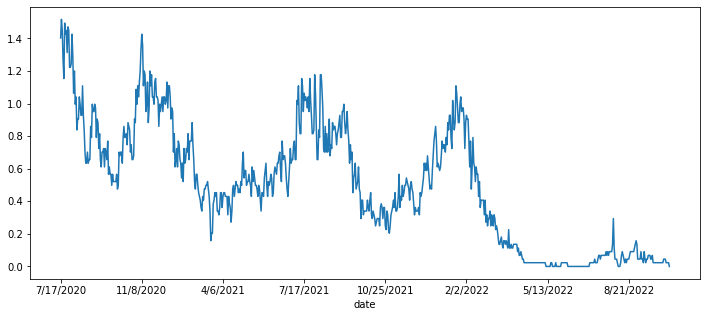

In [73]:
df['icu_patients_per_million'].plot(figsize=(12,5))

#Check For Stationarity

In [74]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [75]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -2.158154966226196
2. P-Value :  0.2217816331413044
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 738
5. Critical Values :
	 1% :  -3.4392418578608983
	 5% :  -2.86546426916434
	 10% :  -2.568859710342903


#Figure Out Order for ARIMA Model

In [76]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [77]:
stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,1:2],start_p=0, start_d=1, start_q=1, max_p=1, max_q=2, max_d=2 , start_P=1,start_Q=1, start_D=1, m=30  ,trace=True, seasonal=True,
                          suppress_warnings=True)           
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=-1618.186, Time=5.63 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=-1564.952, Time=0.27 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=-1607.224, Time=2.87 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=-1620.224, Time=4.08 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=-1566.589, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=-1622.130, Time=0.51 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=-1620.230, Time=3.77 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=-1633.086, Time=0.89 sec
 ARIMA(1,1,1)(1,0,0)[30] intercept   : AIC=-1631.175, Time=6.03 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=-1631.172, Time=10.65 sec
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=-1629.147, Time=15.45 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=-1609.019, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=-1631.315, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=-1628.768, Time=0.71 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  751
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 819.851
Date:                Thu, 24 Nov 2022   AIC                          -1633.703
Time:                        00:45:37   BIC                          -1619.842
Sample:                             0   HQIC                         -1628.362
                                - 751                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3635      0.069      5.254      0.000       0.228       0.499
ma.L1         -0.6572      0.053    -12.324      0.000      -0.762      -0.553
sigma2         0.0066      0.000     29.645      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               240.51
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
#model=auto_arima(df['icu_patients'], start_p=0, start_q=0, d=0,max_p=5,max_q=5,max_d=5,start_P=0,D=0,start_Q=0, max_P=5, max_D=5, max_Q=5, seasonal= True, information_criteria='AIC' )
#model.summary()

In [47]:
from statsmodels.tsa.arima.model import ARIMA

#Split Data into Training and Testing

In [79]:
print(df.shape)
train=df.iloc[:-30,]
test=df.iloc[-30:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(751, 14)
(721, 14) (30, 14)


In [12]:
ts=df['icu_patients_per_million']
ts

date
7/1/2020     576
7/2/2020     594
7/3/2020     620
7/4/2020     637
7/5/2020     658
            ... 
4/14/2022    412
4/15/2022    412
4/16/2022    412
4/17/2022    412
4/24/2022    372
Name: icu_patients, Length: 647, dtype: int64

In [13]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(ts, model='additive')
#result.plot()
#plt.show()

## Train the Model

In [80]:
model=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,1:5] ,order=(0,2,1),seasonal_order=(1,1,1,30) )
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:         icu_patients_per_million   No. Observations:                  721
Model:             ARIMA(0, 2, 1)x(1, 1, 1, 30)   Log Likelihood                 652.035
Date:                          Thu, 24 Nov 2022   AIC                          -1288.070
Time:                                  00:47:32   BIC                          -1251.788
Sample:                                       0   HQIC                         -1274.034
                                          - 721                                         
Covariance Type:                            opg                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
new_deaths_per_million            -0.0248      0.047     -0.527      0.598      -0.117       0.067
reproduction_rate                  0.0701      0.137      0.510      0.610      -0.199       0.339
total_vaccinations_per_hundred    -0.0001      0.001     -0.282      0.778      -0.001       0.001
stringency_index                   0.0037      0.002      1.731      0.083      -0.000       0.008
ma.L1                             -0.9423      0.026    -36.558      0.000      -0.993      -0.892
ar.S.L30                          -0.1092      0.043     -2.535      0.011      -0.194      -0.025
ma.S.L30                          -0.9225      0.057    -16.088      0.000      -1.035      -0.810
sigma2                             0.0080      0.000     17.207      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                  47.23   Jarque-Bera (JB):                63.33
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [82]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(exog=test.iloc[:,1:5],start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

date
9/11/2022     0.041530
9/12/2022     0.049649
9/13/2022     0.073866
9/14/2022     0.056445
9/15/2022     0.063898
9/16/2022     0.068842
9/17/2022     0.090084
9/18/2022     0.084766
9/19/2022     0.095736
9/20/2022     0.078026
9/21/2022     0.095944
9/22/2022     0.127816
9/23/2022     0.140413
9/24/2022     0.115855
9/25/2022     0.094525
9/26/2022     0.075679
9/27/2022     0.108200
9/28/2022     0.106145
9/29/2022     0.102512
9/30/2022     0.126471
10/1/2022     0.149399
10/2/2022     0.141639
10/3/2022     0.131645
10/4/2022     0.100486
10/5/2022     0.111898
10/6/2022     0.097913
10/7/2022     0.141685
10/8/2022     0.136535
10/9/2022     0.111900
10/10/2022    0.109241
Name: predicted_mean, dtype: float64


In [ ]:
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
#pred.index=index_future_dates
#pred.plot(legend=True)
#test['AvgTemp'].plot(legend=True)

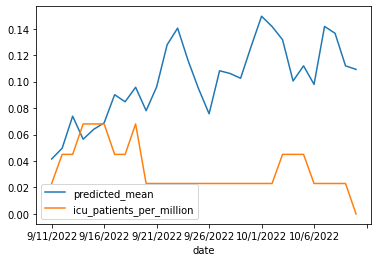

In [84]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)

In [86]:
test['icu_patients_per_million'].mean()

0.03336666666666666

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)


0.07833806828820512


In [ ]:
model2=ARIMA(df['icu_patients'],order=(1,0,5),seasonal_order=(1,1,1,30))
model2=model2.fit()
df.tail()

#For Future Dates

In [69]:
index_future_dates=pd.date_range(start='2022-04-24',end='2022-05-24')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

ValueError: ignored

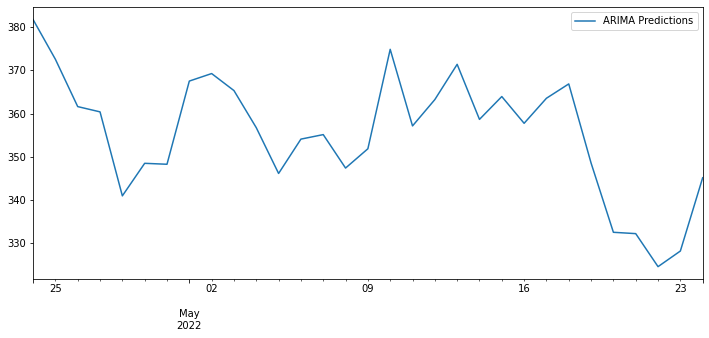

In [29]:
pred.plot(figsize=(12,5),legend=True)
